In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("Advertising.csv")
df=df.drop('Unnamed: 0', axis=1)
df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


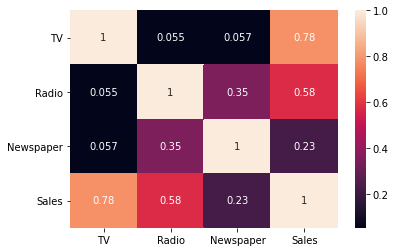

In [7]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

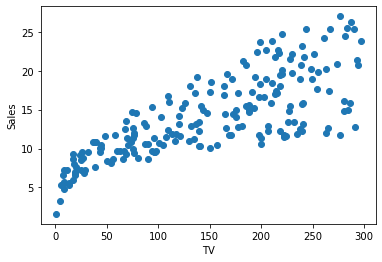

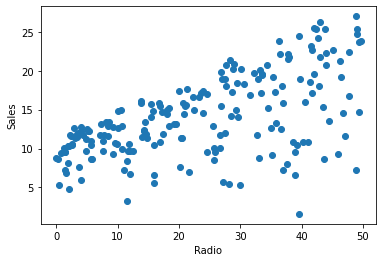

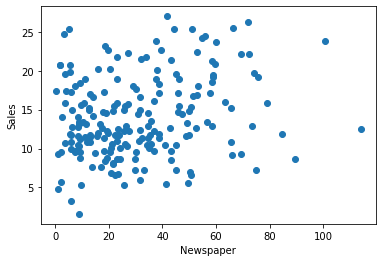

In [8]:
for col in df.columns:
    if col != 'Sales':
        plt.plot(df[col], df['Sales'], 'o')
        plt.xlabel(col)
        plt.ylabel('Sales')
        plt.show()

In [11]:
df['TV_sq'] = df['TV']**2
df['Radio_sq'] = df['Radio']**2
df['TV_Radio'] = df['TV'] * df['Radio']
X = df[['TV', 'Radio', 'Newspaper', 'TV_sq', 'Radio_sq', 'TV_Radio']]
y = df[['Sales']].values

In [12]:
X = df.drop('Sales', axis=1)
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

Mean squared error: 0.3694112644009827


In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['TV', 'Radio', 'Newspaper','TV_sq', 'Radio_sq', 'TV_Radio']])
X_train, X_test, y_train, y_test = train_test_split(scaled_data, df['Sales'], test_size=0.3, random_state=42)
new_data = [[80, 60, 20, 10000, 2500, 625]] # TV = 80, Radio = 60, Newspaper = 20
new_data_scaled = scaler.transform(new_data)
y_pred = model.predict(new_data_scaled)
print("Predicted Sales: ", y_pred[0])

Predicted Sales:  4.870581432592007


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
